In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [2]:
#=================================================-
#### Slide 3/32: Loading packages  ####

import pandas as pd
import numpy as np
import pickle
import os
from pathlib import Path




In [3]:
#=================================================-
#### Slide 4/32: Directory settings  ####

# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)
plot_dir = str(main_dir) + "/plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
print(plot_dir)




/usr/app/20240314_082303779667/assets
/usr/app/20240314_082303779667/assets/data
/usr/app/20240314_082303779667/assets/plots


In [4]:
#=================================================-
#### Slide 5/32: Importing matplotlib  ####

import matplotlib.pyplot as plt




In [5]:
#=================================================-
#### Slide 6/32: Dataset for visualization  ####

# This dataset is of type dataframe. Let's assign this dataset to a variable, so that we can manipulate it freely.
df = pd.read_csv(str(data_dir)+"/"+ "diabetes.csv")
print(type(df))  #<- a Pandas DataFrame!
print(len(df))   #<- returns the number of rows




<class 'pandas.core.frame.DataFrame'>
768


In [6]:
#=================================================-
#### Slide 7/32: Subsetting data  ####

df_subset = df[['DiabetesPedigreeFunction', 'Glucose', 'BloodPressure', 'Age', 'SkinThickness', 'BMI', 'Insulin', 'Outcome', 'Pregnancies']]
print(df_subset.head())




   DiabetesPedigreeFunction  Glucose  BloodPressure  Age  SkinThickness   BMI  \
0                     0.627      148             72   50             35  33.6   
1                     0.351       85             66   31             29  26.6   
2                     0.672      183             64   32              0  23.3   
3                     0.167       89             66   21             23  28.1   
4                     2.288      137             40   33             35  43.1   

   Insulin  Outcome  Pregnancies  
0        0        1            6  
1        0        0            1  
2        0        1            8  
3       94        0            1  
4      168        1            0  


In [7]:
#=================================================-
#### Slide 11/32: Prepare data: group and summarize (cont'd)  ####

col_dict = df_subset.nunique().to_dict()
grouping_col = min(col_dict, key=col_dict.get)
# Group data by variable with min levels.
grouped = df_subset.groupby(grouping_col)
# Compute mean on the listed variables using the grouped data.
df_grouped_mean = grouped.mean()[['DiabetesPedigreeFunction', 'Glucose', 'BloodPressure', 'Age', 'SkinThickness', 'BMI', 'Insulin']]
print(df_grouped_mean)




         DiabetesPedigreeFunction     Glucose  BloodPressure        Age  \
Outcome                                                                   
0                        0.429734  109.980000      68.184000  31.190000   
1                        0.550500  141.257463      70.824627  37.067164   

         SkinThickness        BMI     Insulin  
Outcome                                        
0            19.664000  30.304200   68.792000  
1            22.164179  35.142537  100.335821  


In [8]:
#=================================================-
#### Slide 12/32: Prepare data: group and summarize (cont'd)  ####

# Reset index of the dataset.
df_grouped_mean = df_grouped_mean.reset_index()
print(df_grouped_mean)




   Outcome  DiabetesPedigreeFunction     Glucose  BloodPressure        Age  \
0        0                  0.429734  109.980000      68.184000  31.190000   
1        1                  0.550500  141.257463      70.824627  37.067164   

   SkinThickness        BMI     Insulin  
0      19.664000  30.304200   68.792000  
1      22.164179  35.142537  100.335821  


In [9]:
#=================================================-
#### Slide 15/32: Wide to long format: melt (cont'd)  ####

# Melt the wide data into long.
df_grouped_mean_long = pd.melt(df_grouped_mean,       #<- wide dataset
                                  id_vars = [grouping_col],     #<- identifying variable
                                  var_name = 'metric',      #<- contains col names of wide data
                                  value_name = 'mean')      #<- contains values from above columns
print(df_grouped_mean_long) 




    Outcome                    metric        mean
0         0  DiabetesPedigreeFunction    0.429734
1         1  DiabetesPedigreeFunction    0.550500
2         0                   Glucose  109.980000
3         1                   Glucose  141.257463
4         0             BloodPressure   68.184000
5         1             BloodPressure   70.824627
6         0                       Age   31.190000
7         1                       Age   37.067164
8         0             SkinThickness   19.664000
9         1             SkinThickness   22.164179
10        0                       BMI   30.304200
11        1                       BMI   35.142537
12        0                   Insulin   68.792000
13        1                   Insulin  100.335821


In [10]:
#=================================================-
#### Slide 17/32: Long to wide format: pivot (cont'd)  ####

# Melt the long data into wide.
df_grouped_mean_wide = df_grouped_mean_long.pivot(
                                                    index = [grouping_col],   #<- identifying variable
                                                    columns = 'metric', #<- col names of wide data
                                                    values = 'mean')    #<- values from above columns
print(df_grouped_mean_wide)




metric         Age        BMI  BloodPressure  DiabetesPedigreeFunction  \
Outcome                                                                  
0        31.190000  30.304200      68.184000                  0.429734   
1        37.067164  35.142537      70.824627                  0.550500   

metric      Glucose     Insulin  SkinThickness  
Outcome                                         
0        109.980000   68.792000      19.664000  
1        141.257463  100.335821      22.164179  


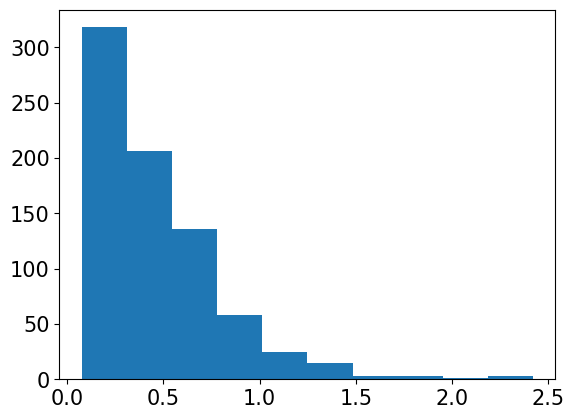

In [11]:
#=================================================-
#### Slide 20/32: Univariate plots: histogram  ####

plt.rcParams.update({'font.size': 15})
plt.hist(df_subset['DiabetesPedigreeFunction'])
plt.show()




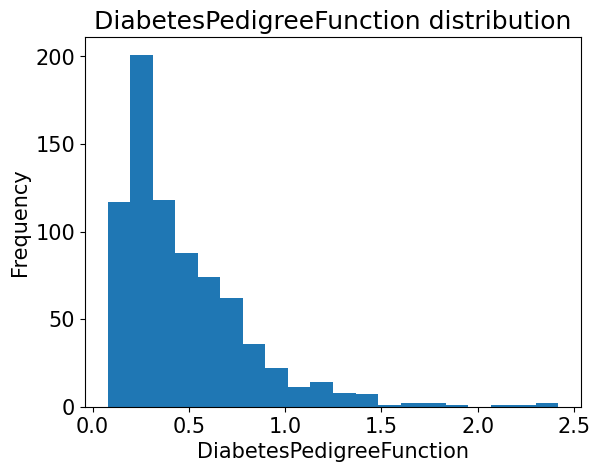

In [12]:
#=================================================-
#### Slide 21/32: Univariate plots: histogram (cont'd)  ####

plt.hist(df_subset['DiabetesPedigreeFunction'], bins = 20)
plt.xlabel('DiabetesPedigreeFunction')       #<- label x-axis
plt.ylabel('Frequency')      #<- label y-axis
plt.title('DiabetesPedigreeFunction distribution')      #<- add plot title
plt.show()




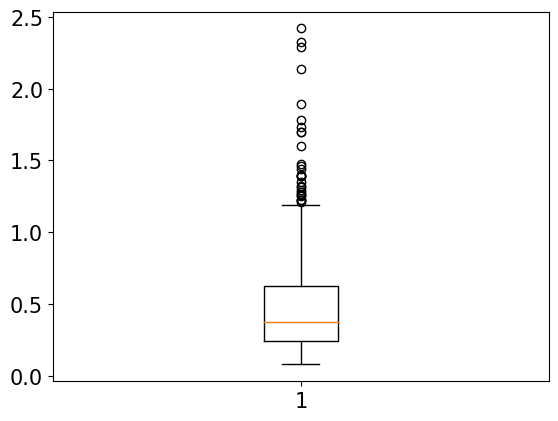

In [13]:
#=================================================-
#### Slide 22/32: Univariate plots: boxplot  ####

plt.boxplot(df_subset['DiabetesPedigreeFunction'])
plt.show()




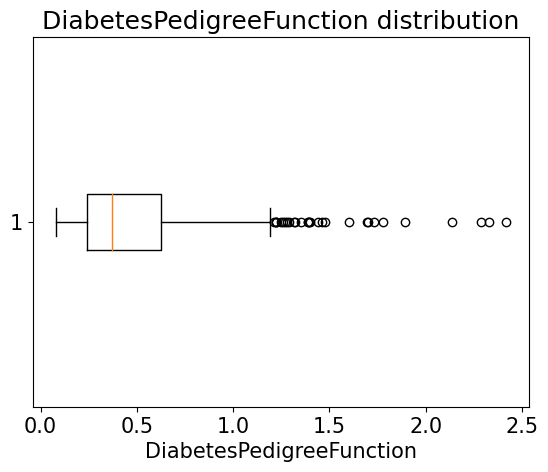

In [14]:
#=================================================-
#### Slide 23/32: Univariate plots: boxplot (cont'd)  ####

plt.boxplot(df_subset['DiabetesPedigreeFunction'], vert = False)
plt.xlabel('DiabetesPedigreeFunction')       # label x-axis
plt.title('DiabetesPedigreeFunction distribution')      # add plot title
plt.show()




In [15]:
#=================================================-
#### Slide 25/32: Univariate plots: bar chart - cont'd  ####

print(df_grouped_mean_long.head())




   Outcome                    metric        mean
0        0  DiabetesPedigreeFunction    0.429734
1        1  DiabetesPedigreeFunction    0.550500
2        0                   Glucose  109.980000
3        1                   Glucose  141.257463
4        0             BloodPressure   68.184000


In [16]:
#=================================================-
#### Slide 26/32: Univariate plots: bar chart - cont'd  ####

query = 'Outcome' + "==" + str('0')
df_true_means = df_grouped_mean_long.query(query)[['metric','mean']]
print(df_true_means)




                      metric        mean
0   DiabetesPedigreeFunction    0.429734
2                    Glucose  109.980000
4              BloodPressure   68.184000
6                        Age   31.190000
8              SkinThickness   19.664000
10                       BMI   30.304200
12                   Insulin   68.792000


In [17]:
#=================================================-
#### Slide 27/32: Univariate plots: bar chart - cont'd  ####

bar_labels = df_true_means['metric']     #<- 1
bar_heights = df_true_means['mean']      #<- 2
num_bars = len(bar_heights)
bar_positions = np.arange(num_bars)      #<- 3




Text(0, 0.5, 'Mean values')

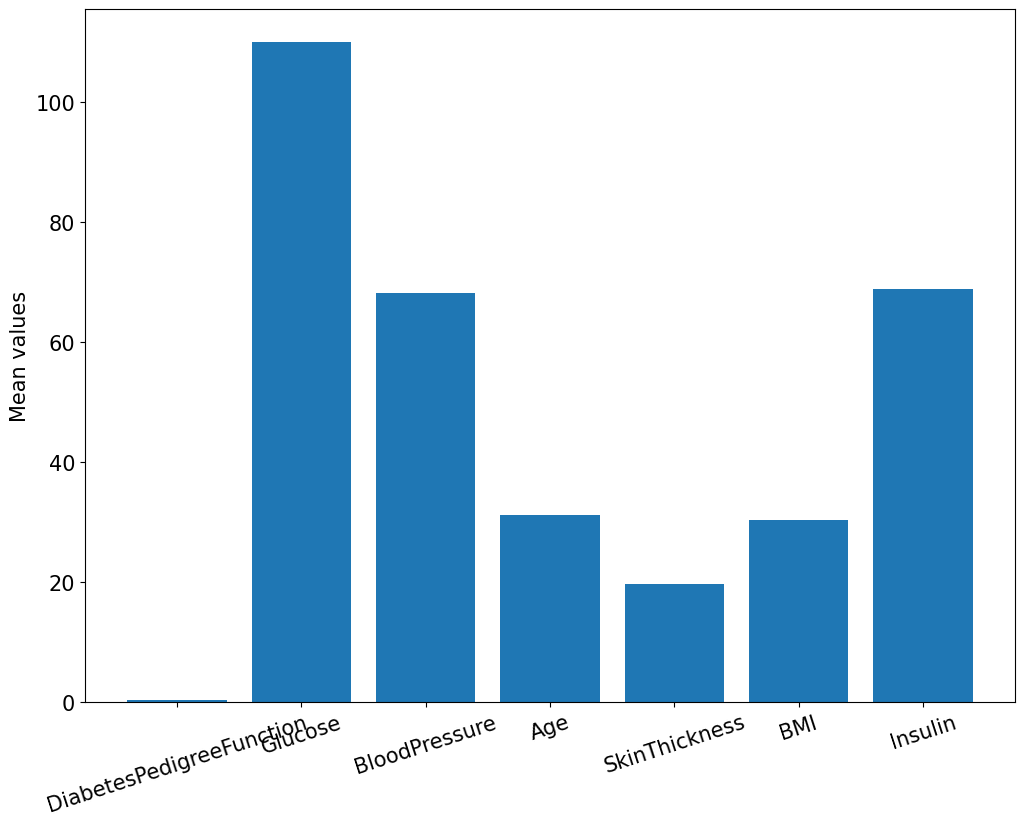

In [18]:
#=================================================-
#### Slide 28/32: Univariate plots: bar chart - cont'd  ####

plt.figure(figsize = (12, 9)) 
plt.bar(bar_positions, bar_heights)
plt.xticks(bar_positions,bar_labels,rotation = 18)
plt.ylabel('Mean values')


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [19]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




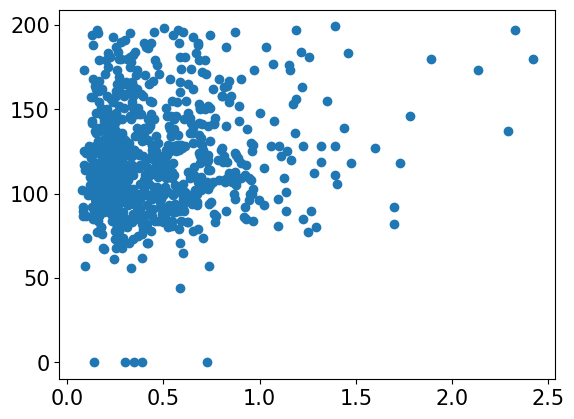

In [20]:
#=================================================-
#### Slide 13/32: Bivariate plots: scatterplot  ####

plt.scatter(df_subset['DiabetesPedigreeFunction'],
            df_subset['Glucose'])
plt.show()




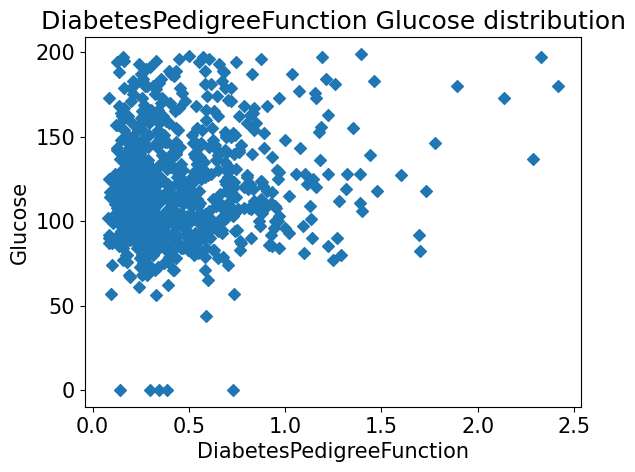

In [21]:
#=================================================-
#### Slide 14/32: Bivariate plots: scatterplot - cont'd  ####

plt.scatter(df_subset['DiabetesPedigreeFunction'],
            df_subset['Glucose'],
            marker = "D") #<- set marker type to diamond
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Glucose')
plt.title('DiabetesPedigreeFunction Glucose distribution')
plt.show()




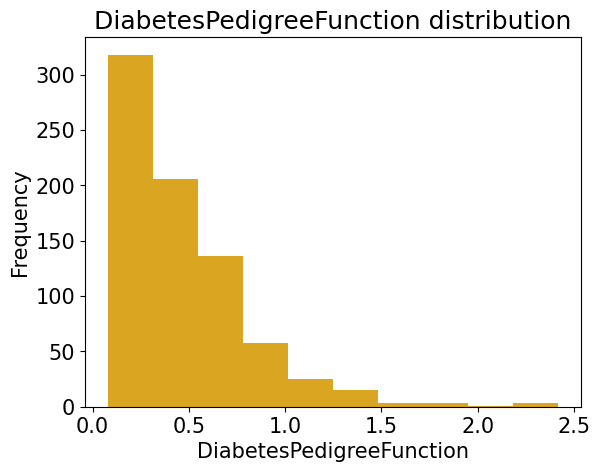

In [22]:
#=================================================-
#### Slide 17/32: Customize colors - cont'd  ####

plt.hist(df_subset['DiabetesPedigreeFunction'],
            facecolor = 'goldenrod') #<- set color
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.title('DiabetesPedigreeFunction distribution')
plt.show()




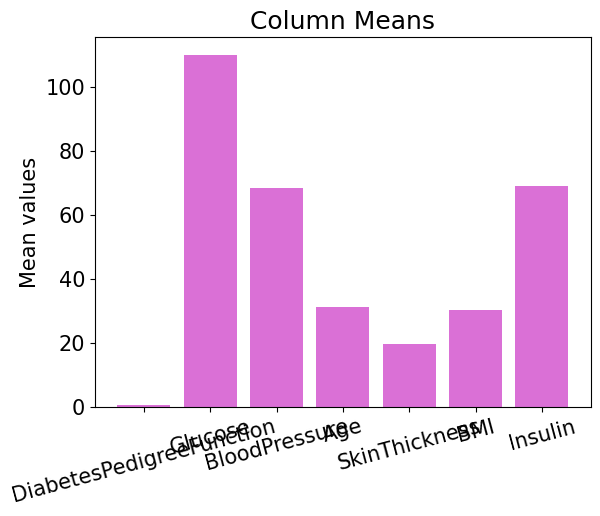

In [23]:
#=================================================-
#### Slide 18/32: Customize colors - cont'd  ####

plt.bar(bar_positions, 
        bar_heights, 
        color = "orchid")
plt.xticks(bar_positions, 
           bar_labels,
           rotation=15)
plt.ylabel('Mean values')
plt.title('Column Means')  
plt.show()




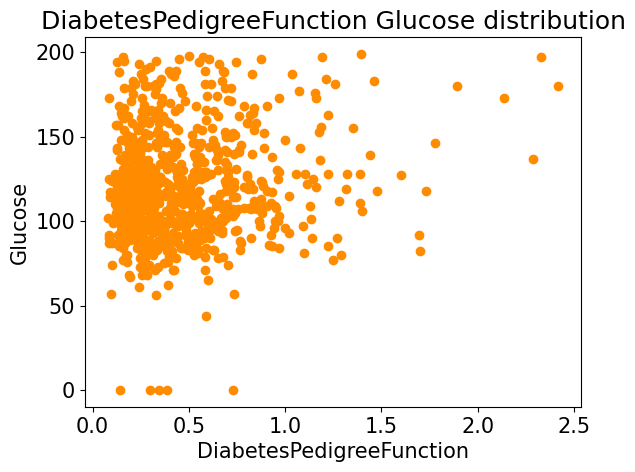

In [24]:
#=================================================-
#### Slide 19/32: Customize color: scatterplot  ####

plt.scatter(df_subset['DiabetesPedigreeFunction'],
            df_subset['Glucose'],
            c = 'darkorange') #<- set marker type to diamond
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Glucose')
plt.title('DiabetesPedigreeFunction Glucose distribution')
plt.show()




0    palevioletred
1     darkseagreen
2    palevioletred
3     darkseagreen
4    palevioletred
Name: Outcome, dtype: object


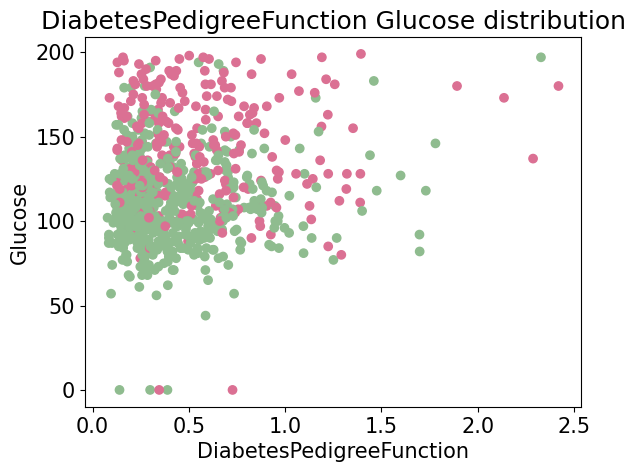

In [25]:
#=================================================-
#### Slide 21/32: Customize color: map colors - cont'd  ####

color_dict = {int('0'): 'darkseagreen', 
              int('1'): 'palevioletred'}
color = df_subset['Outcome'].map(color_dict)
print(color.head())
plt.scatter(df_subset['DiabetesPedigreeFunction'],
            df_subset['Glucose'],
            c = color)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Glucose')
plt.title('DiabetesPedigreeFunction Glucose distribution')
plt.show()




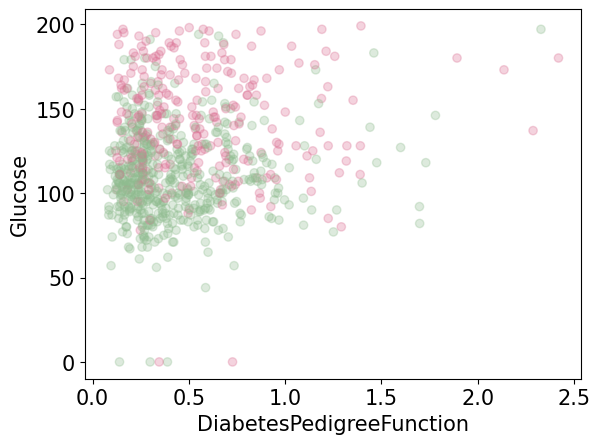

In [26]:
#=================================================-
#### Slide 23/32: Customize color: opacity (cont'd)  ####

plt.scatter(df_subset['DiabetesPedigreeFunction'],df_subset['Glucose'],
            c = color, alpha = 0.3)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Glucose')
plt.show()




In [27]:
#=================================================-
#### Slide 24/32: Customize plot settings: available styles  ####

print(plt.style.available)
plt.style.use('ggplot')




['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


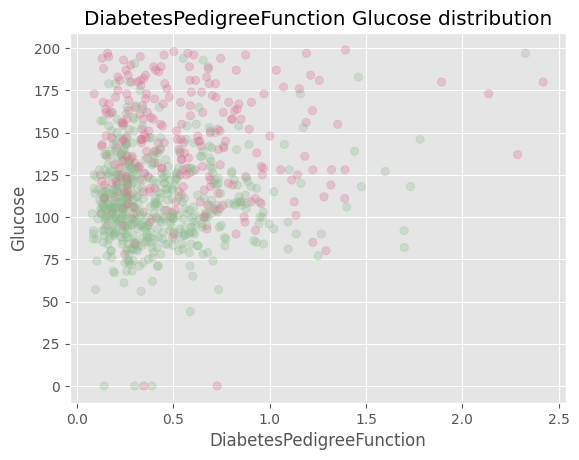

In [28]:
#=================================================-
#### Slide 25/32: Customize plot settings: test ggplot style  ####

plt.scatter(df_subset['DiabetesPedigreeFunction'],
            df_subset['Glucose'],
            c = color,
            alpha = 0.3)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Glucose')
plt.title('DiabetesPedigreeFunction Glucose distribution')
plt.show()




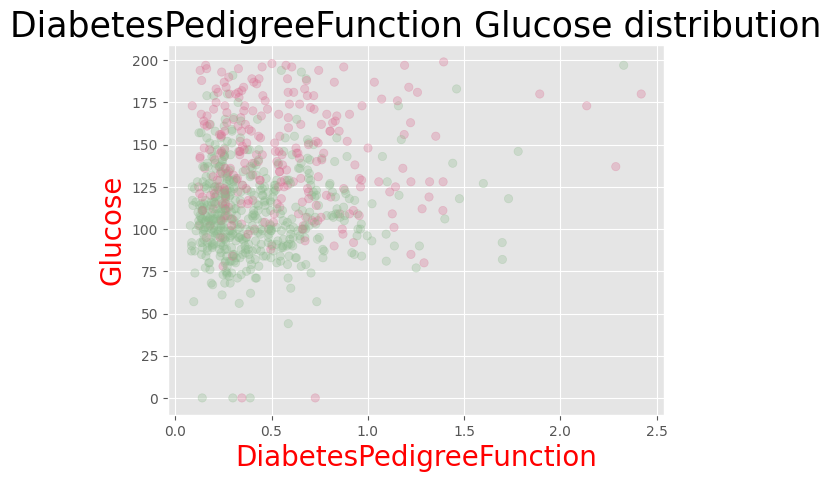

In [29]:
#=================================================  -
#### Slide 27/32: Customize plot settings: labels  ####

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelcolor'] = 'red'
plt.rcParams['axes.titlesize'] = 25
plt.scatter(df_subset['DiabetesPedigreeFunction'],
            df_subset['Glucose'],
            c = color,
            alpha = 0.3)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Glucose')
plt.title('DiabetesPedigreeFunction Glucose distribution')
plt.show()




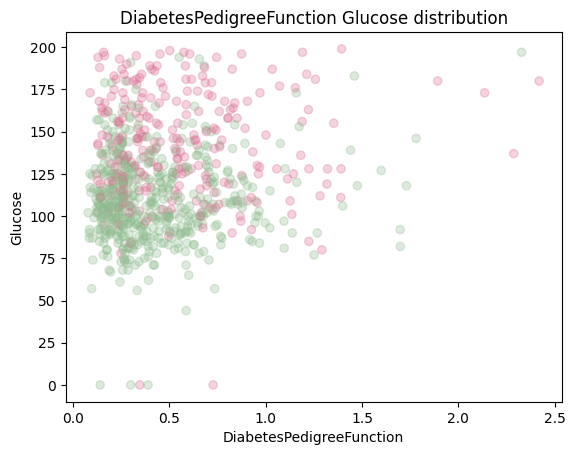

In [30]:
#================================================= -
#### Slide 28/32: Customize plot settings: reset defaults  ####

plt.rcdefaults()
plt.scatter(df_subset['DiabetesPedigreeFunction'],
            df_subset['Glucose'],
            c = color,
            alpha = 0.3)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Glucose')
plt.title('DiabetesPedigreeFunction Glucose distribution')
plt.show()


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [31]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




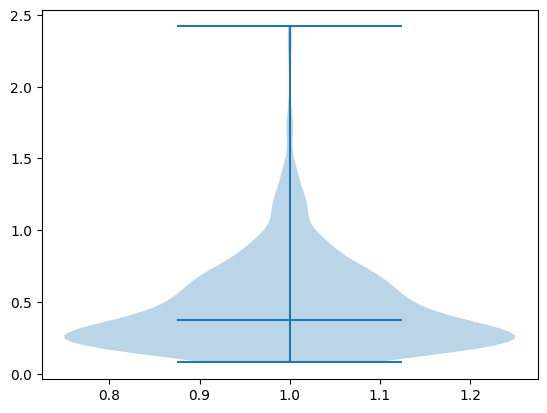

In [32]:
#=================================================-
#### Slide 4/29: Complex univariate plots: violin plots  ####

plt.violinplot(df_subset['DiabetesPedigreeFunction'],
               showmeans=False,  
               showmedians=True)
plt.show()




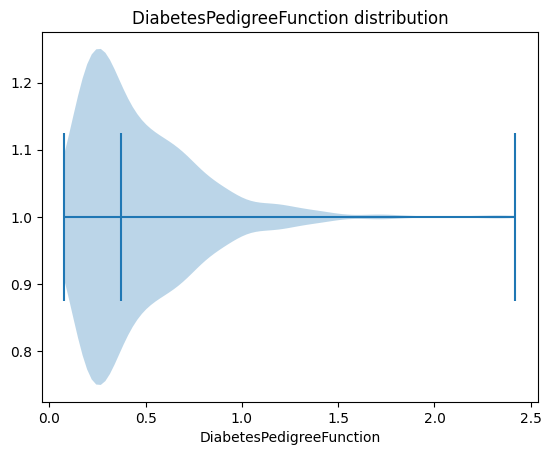

In [33]:
#=================================================-
#### Slide 6/29: Univariate plots: violin plot (cont'd)  ####

plt.violinplot(df_subset['DiabetesPedigreeFunction'], vert = False, showmeans=False, showmedians=True)
plt.xlabel('DiabetesPedigreeFunction')
plt.title('DiabetesPedigreeFunction distribution')
plt.show()




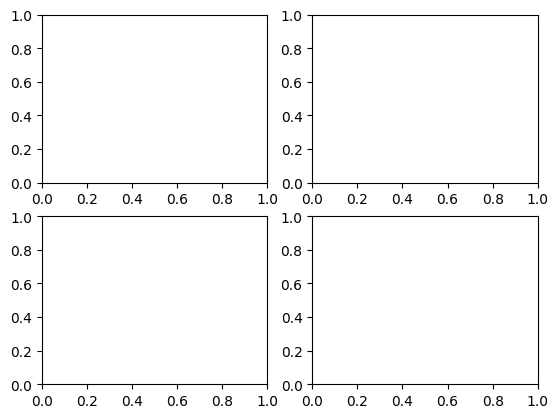

In [34]:
#=================================================-
#### Slide 8/29: Compound visualizations: grids  ####

# Create a 2 x 2 figure and axes grid.
fig, axes = plt.subplots(2, 2) 
plt.show()




In [35]:
#=================================================-
#### Slide 9/29: Compound visualizations: axes  ####

print(axes)




[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

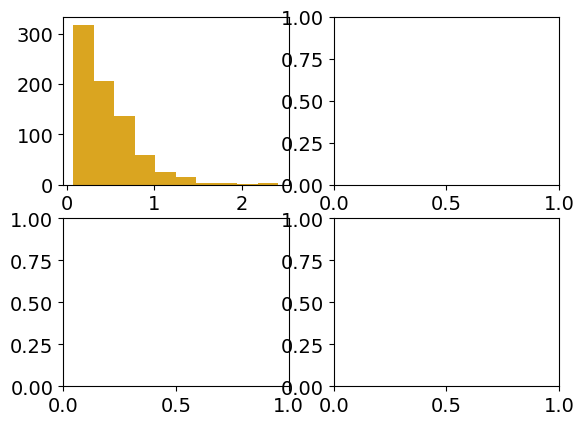

In [36]:
#=================================================-
#### Slide 10/29: Compound visualizations: axes (cont'd)  ####

plt.clf()
plt.figure(figsize = (8, 8))
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(2, 2) 

axes[0, 0].hist(df_subset['DiabetesPedigreeFunction'], 
                facecolor = 'goldenrod') #<- set color




<Figure size 1200x800 with 0 Axes>

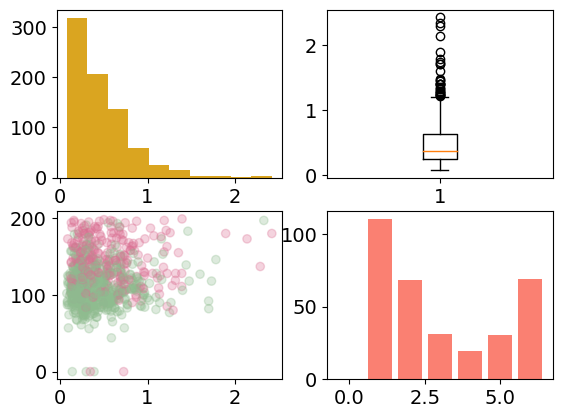

In [37]:
#=================================================-
#### Slide 11/29: Compound visualizations: axes (cont'd)  ####

plt.figure(figsize = (12, 8))
fig, axes = plt.subplots(2, 2)
color_dict = {int('0'): 'darkseagreen', 
              int('1'): 'palevioletred'}
color = df_subset['Outcome'].map(color_dict)
axes[0, 0].hist(df_subset['DiabetesPedigreeFunction'],
                facecolor = 'goldenrod') #<- set color
axes[0, 1].boxplot(df_subset['DiabetesPedigreeFunction']) 
axes[1, 0].scatter(df_subset['DiabetesPedigreeFunction'],
                   df_subset['Glucose'],
                   c = color,
                   alpha = 0.3)
axes[1, 1].bar(bar_positions, bar_heights,
               color = "salmon")
plt.show()




In [38]:
#=================================================-
#### Slide 12/29: Compound visualizations: labeling axes  ####

# Histogram.
axes[0, 0].set_ylabel('DiabetesPedigreeFunction distribution')
axes[0, 0].set_xlabel('DiabetesPedigreeFunction')

# Boxplot.
axes[0, 1].set_ylabel('DiabetesPedigreeFunction')

# Scatterplot.
axes[1, 0].set_xlabel('DiabetesPedigreeFunction')
axes[1, 0].set_ylabel('Glucose')

# Mean values of categories of variable means.
axes[1, 1].set_ylabel('Mean values')




Text(274.98989898989896, 0.5, 'Mean values')

In [39]:
#=================================================-
#### Slide 13/29: Compound visualizations: labeling ticks   ####

# No labels for ticks for boxplot.
axes[0, 1].xaxis.set_ticklabels([""])
# Tick positions set to bar positions in bar chart.
axes[1, 1].xaxis.set_ticks(bar_positions)

# Tick labels set to bar categories in bar chart.
axes[1, 1].xaxis.set_ticklabels(bar_labels,rotation = 18)




[Text(0, 0, 'DiabetesPedigreeFunction'),
 Text(1, 0, 'Glucose'),
 Text(2, 0, 'BloodPressure'),
 Text(3, 0, 'Age'),
 Text(4, 0, 'SkinThickness'),
 Text(5, 0, 'BMI'),
 Text(6, 0, 'Insulin')]

In [40]:
#=================================================-
#### Slide 14/29: Compound visualizations: figure adjustments  ####

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.titlesize'] = 25
fig.set_size_inches(18, 7.5)
fig.suptitle('Data Summary')




Text(0.5, 0.98, 'Data Summary')

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

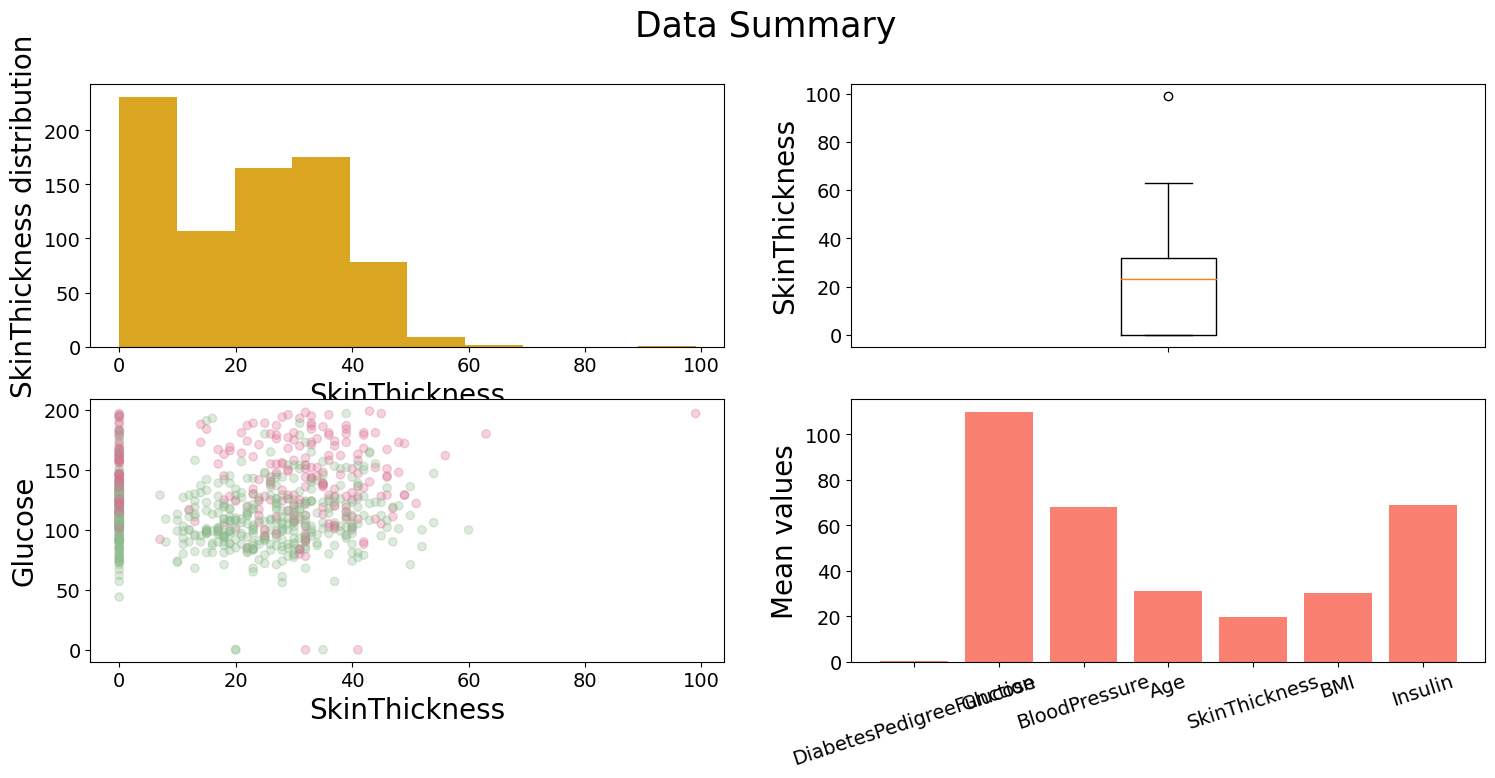

In [41]:
#=================================================-
#### Slide 15/29: Compound visualizations: putting it all together  ####

plt.clf()
plt.figure(figsize = (8, 8))
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(2, 2) 

color_dict = {int('0'): 'darkseagreen', 
              int('1'): 'palevioletred'}
color = df_subset['Outcome'].map(color_dict)
axes[0, 0].hist(df_subset['SkinThickness'],
                facecolor = 'goldenrod') #<- set color
axes[0, 1].boxplot(df_subset['SkinThickness']) 
axes[1, 0].scatter(df_subset['SkinThickness'],
                   df_subset['Glucose'],
                   c = color,
                   alpha = 0.3)
axes[1, 1].bar(bar_positions, bar_heights,
               color = "salmon")
               
# Histogram.
axes[0, 0].set_ylabel('SkinThickness distribution')
axes[0, 0].set_xlabel('SkinThickness')

# Boxplot.
axes[0, 1].set_ylabel('SkinThickness')

# Scatterplot.
axes[1, 0].set_xlabel('SkinThickness')
axes[1, 0].set_ylabel('Glucose')

# Mean values of categories of variable means.
axes[1, 1].set_ylabel('Mean values')  

# No labels for ticks for boxplot.
axes[0, 1].xaxis.set_ticklabels([""])

# Tick positions set to bar positions in bar chart.
axes[1, 1].xaxis.set_ticks(bar_positions)

# Tick labels set to bar categories in bar chart.
axes[1, 1].xaxis.set_ticklabels(bar_labels,rotation = 18)

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.titlesize'] = 25
fig.set_size_inches(18, 7.5)
fig.suptitle('Data Summary')
plt.show()




<Figure size 640x480 with 0 Axes>

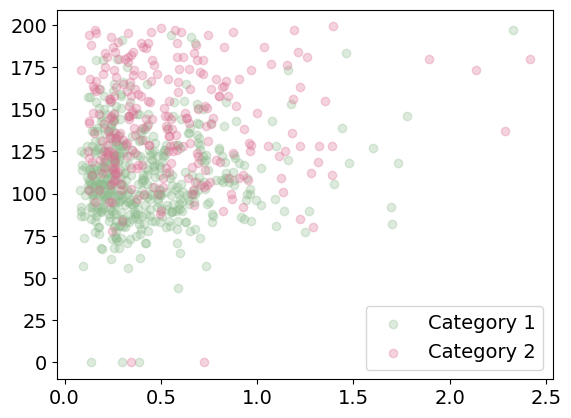

In [42]:
#=================================================-
#### Slide 18/29: Compound visualizations: layered plots (cont'd)  ####

plt.clf()                  #<- clear plotting area
fig, axes = plt.subplots() #<- create a new figure and axes objects for plotting

grouping_col_levels = list(df_grouped_mean_long[grouping_col].unique())
grouping_category_1 = grouping_col_levels[0]
grouping_category_2 = grouping_col_levels[1]

for key, value in color_dict.items():
    query = str('Outcome') + '==' + str(key)
    sc_col_1 = df_subset.query(query)['DiabetesPedigreeFunction']
    sc_col_2 = df_subset.query(query)['Glucose']

    if key == int(grouping_category_1):
        Flag = "Category 1"
    else:
        Flag = "Category 2"

    axes.scatter(sc_col_1, 
                 sc_col_2, 
                 c = value, 
                 label = Flag,
                 alpha = 0.3)
axes.legend()  #<- add a legend that would automatically get labels and colors from layers!   

plt.show()




In [43]:
#=================================================-
#### Slide 20/29: Compound visualizations: layered plots (cont'd)  ####

# We already have `'Outcome'` = `'0'` mean data.
print(df_true_means.head())
# Let's get the `'Outcome'` = `'1'` mean data.
query = str('Outcome') + '==' + str('1')
df_false_means = df_grouped_mean_long.query(query)[['metric','mean']]
print(df_false_means)




                     metric        mean
0  DiabetesPedigreeFunction    0.429734
2                   Glucose  109.980000
4             BloodPressure   68.184000
6                       Age   31.190000
8             SkinThickness   19.664000
                      metric        mean
1   DiabetesPedigreeFunction    0.550500
3                    Glucose  141.257463
5              BloodPressure   70.824627
7                        Age   37.067164
9              SkinThickness   22.164179
11                       BMI   35.142537
13                   Insulin  100.335821


In [44]:
#=================================================-
#### Slide 21/29: Compound visualizations: layered plots (cont'd)  ####

# Mean values for `'Outcome'` = `'0'` data.
category_1_bar_heights = df_true_means['mean'] 
# Mean values for `'Outcome'` = `'1'` data.
category_2_bar_heights = df_false_means['mean']  
# Labels of bars, their width, and positions are shared for both categories.
bar_labels = df_false_means['metric'] 
num_bars = len(bar_labels)
bar_positions = np.arange(num_bars)       
width = 0.35




<Figure size 640x480 with 0 Axes>

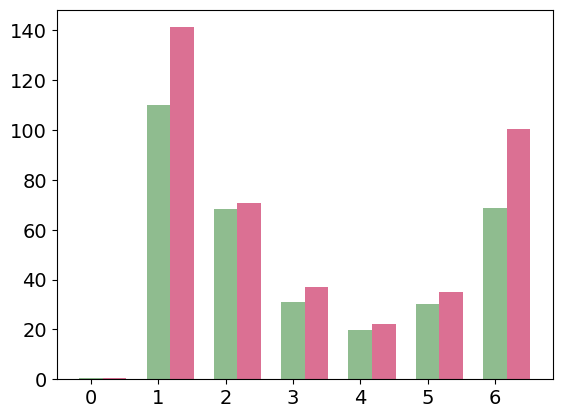

In [45]:
#=================================================-
#### Slide 22/29: Compound visualizations: layered plots (cont'd)  ####

# Clear the plotting area for the new plot.
plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()
category_1_bar_chart = axes.bar(bar_positions,          #<- set bar positions
                            category_1_bar_heights,     #<- set bar heights
                            width,                 #<- set width of the bars
                            color = color_dict[0]) #<- set color corresponding to '0' in dictionary
category_2_bar_chart = axes.bar(bar_positions + width, #<- set bar positions 
                          category_2_bar_heights,      #<- set bar heights
                          width,                 #<- set width of the bars
                          color = color_dict[1]) #<- set color corresponding to '1' in dictionary




In [46]:
#=================================================-
#### Slide 23/29: Compound visualizations: layered plots (cont'd)  ####

# Add text for labels, title and axes ticks.
axes.set_ylabel('Mean values')
axes.set_title('Data metrics summary')
axes.set_xticks(bar_positions + width/2)
axes.set_xticklabels(bar_labels)




[Text(0.175, 0, 'DiabetesPedigreeFunction'),
 Text(1.175, 0, 'Glucose'),
 Text(2.175, 0, 'BloodPressure'),
 Text(3.175, 0, 'Age'),
 Text(4.175, 0, 'SkinThickness'),
 Text(5.175, 0, 'BMI'),
 Text(6.175, 0, 'Insulin')]

<Figure size 640x480 with 0 Axes>

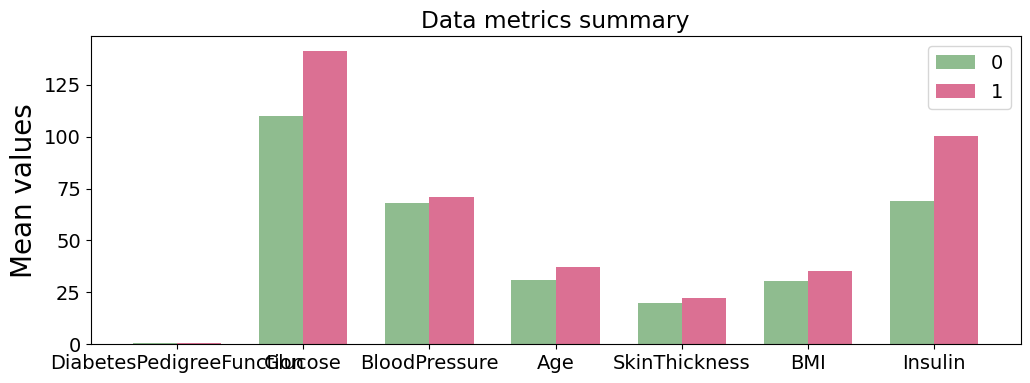

In [47]:
#=================================================-
#### Slide 24/29: Compound visualizations: layered plots (cont'd)  ####

# Clear the plotting area for the new plot.
plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()

category_1_bar_chart = axes.bar(bar_positions,          #<- set bar positions
                            category_1_bar_heights,     #<- set bar heights
                            width,                 #<- set width of the bars
                            color = color_dict[0]) #<- set color corresponding to '0' in dictionary
category_2_bar_chart = axes.bar(bar_positions + width, #<- set bar positions 
                          category_2_bar_heights,      #<- set bar heights
                          width,                 #<- set width of the bars
                          color = color_dict[1]) #<- set color corresponding to '1' in dictionary

# Add text for labels, title and axes ticks.
axes.set_ylabel('Mean values')
axes.set_title('Data metrics summary')
axes.set_xticks(bar_positions + width/2)
axes.set_xticklabels(bar_labels)

# Add a legend for each chart and corresponding labels.
axes.legend((category_1_bar_chart, category_2_bar_chart), (f'{grouping_category_1}', f'{grouping_category_2}'))
fig.set_size_inches(12, 4)
plt.show()




In [48]:
#=================================================-
#### Slide 28/29: Exercise  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
